In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import plotting
%matplotlib inline
plt.style.use('fivethirtyeight')

# interactive visualization
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected= True)
import plotly.figure_factory as ff

In [20]:
df = pd.read_csv('Mall_Customers.csv')
dat = ff.create_table(df)
py.iplot(dat)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
py.iplot(ff.create_table(df.describe()))

In [25]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

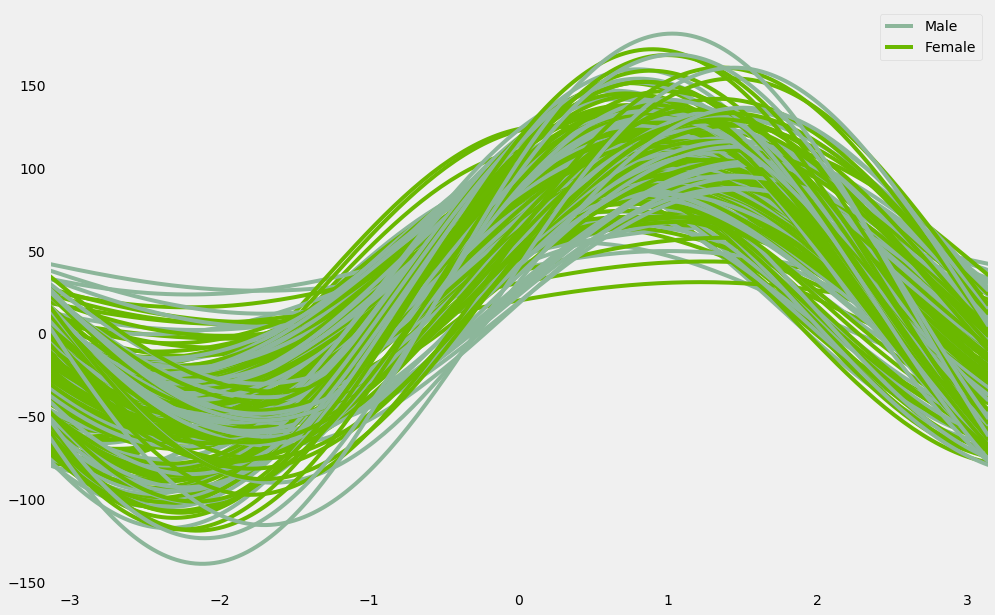

In [28]:
# Andrew Curves
plt.figure(figsize=(15,10))

plotting.andrews_curves(df.drop(['CustomerID'], axis=1), 'Gender')

Text(0, 0.5, 'Count')

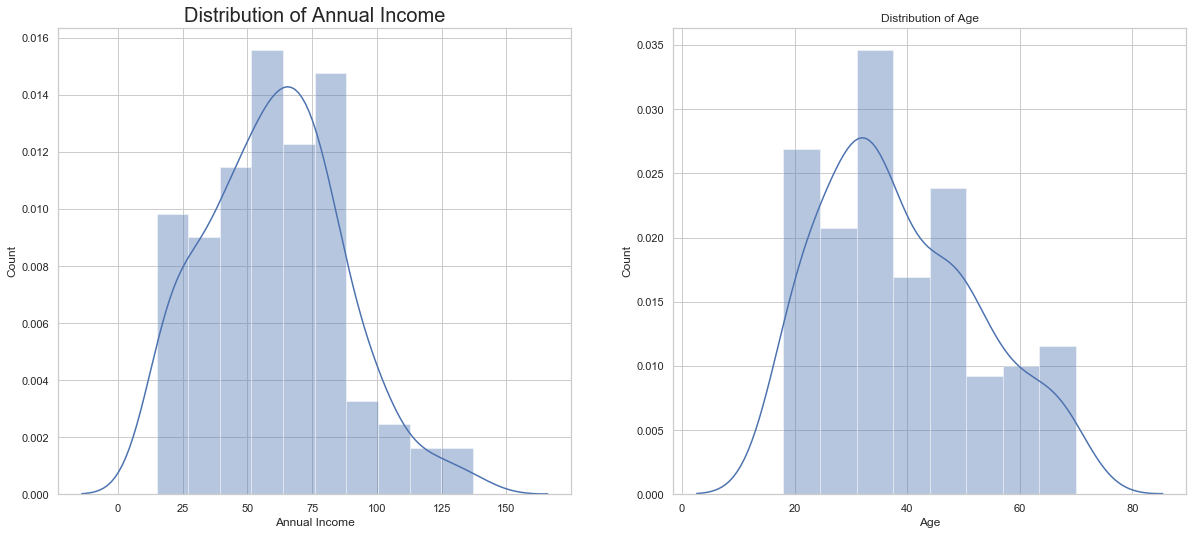

In [33]:
# Distplot

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.set(style='whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

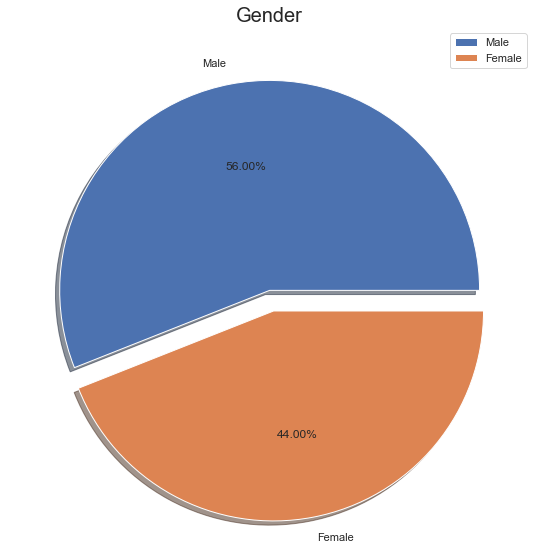

In [56]:
labels = df['Gender'].unique()
size = df['Gender'].value_counts()
colors = ['blue', 'orange']
explode = [0, 0.1]

plt.figure(figsize=(9,9))
plt.pie(x = size, explode= explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')
plt.legend()

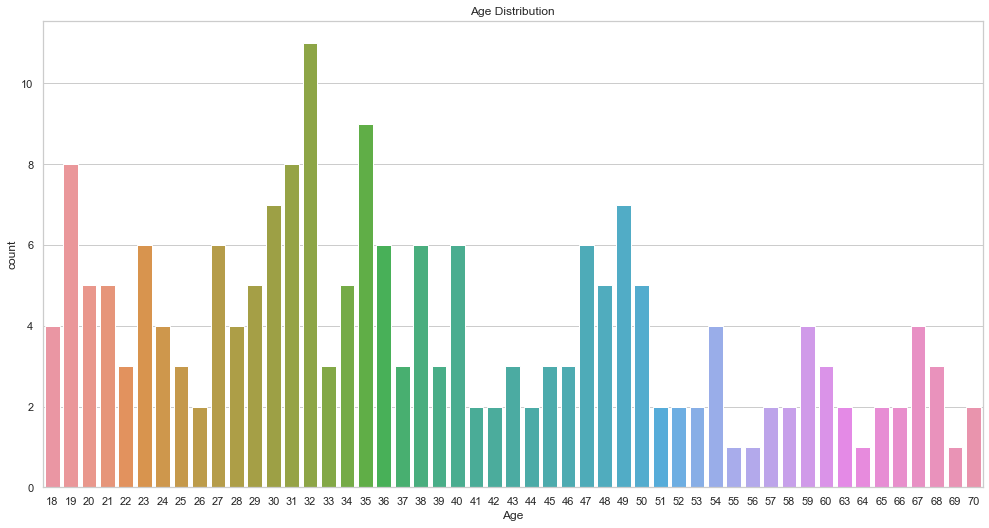

In [58]:
plt.figure(figsize=(15, 8))
plt.title('Age Distribution')
sns.countplot(df['Age'])

<Figure size 1080x576 with 0 Axes>

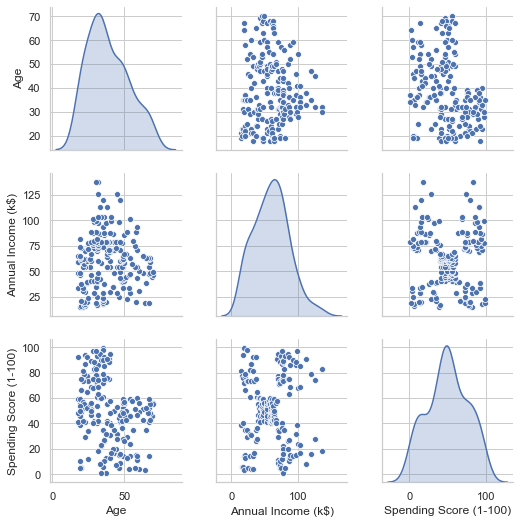

In [64]:
plt.figure(figsize=(15,8))
sns.pairplot(df.iloc[:,1:], diag_kind='kde')

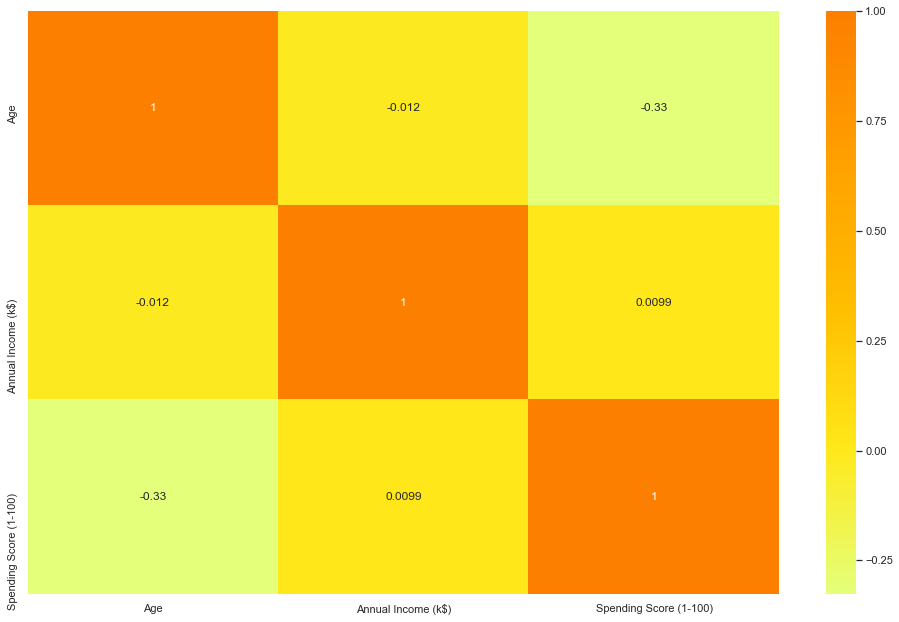

In [68]:
sns.heatmap(df.iloc[:,1:].corr(), cmap='Wistia', annot=True)

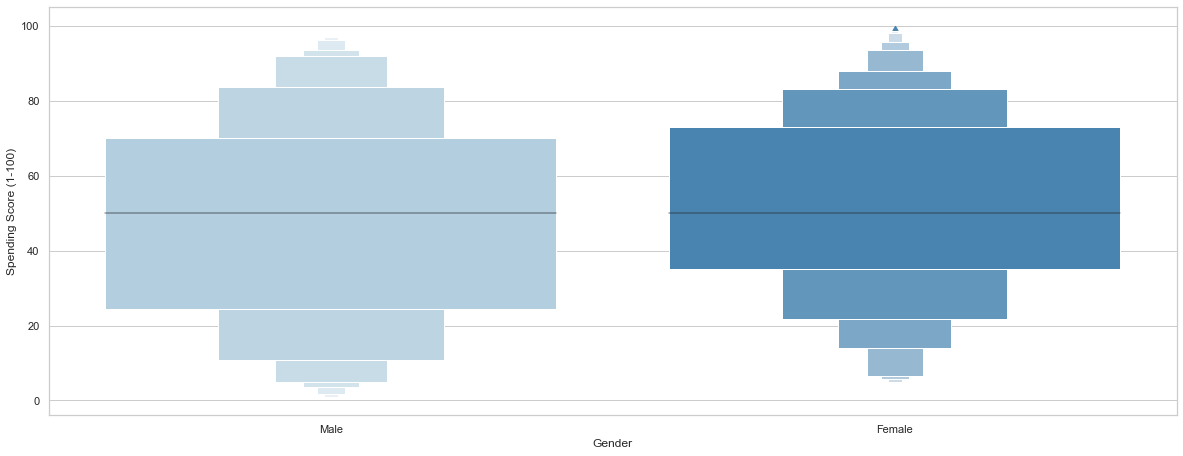

In [73]:
plt.figure(figsize=(18,7))
sns.boxenplot(y=df['Spending Score (1-100)'],  x=df['Gender'], palette='Blues')

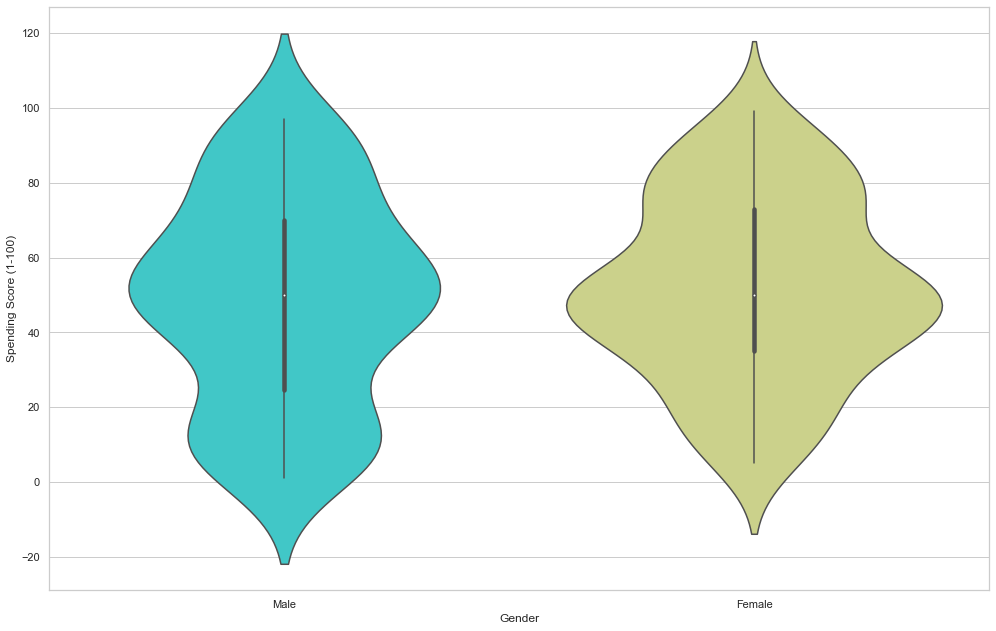

In [74]:
sns.violinplot(df['Gender'], df['Spending Score (1-100)'], palette='rainbow')